# SUPPORT VECTOR MACHINE(SVM)

# Data

We will be using the famous Iris Flower dataset.
   The Iris flower dataset is a multivariate dataset introduced by sir Ronald FIsher in the 1936 as an example of discriminant analysis.
   The data set consists of 50 samples from each of three species of Iris(Iris setosa,Iris virginica and iris versicolor),so 150 samples in total.Four samples were measured from each sample :the length and the width of the sepals and petals,in centimeters. 

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing the necessary libraries

In [57]:
iris=pd.read_csv(r'C:\Users\DELL LATITUDE E7440\Desktop\python 3\seaborn-data-master\iris.csv')

In [58]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Cleaning

In [59]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [60]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [61]:
iris.duplicated().sum()

1

In [62]:
iris.drop_duplicates(inplace=True)

iris.duplicated().sum()

0

In [63]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [64]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

# Exploratory Data Analysis 

C:\Users\DELL LATITUDE E7440\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


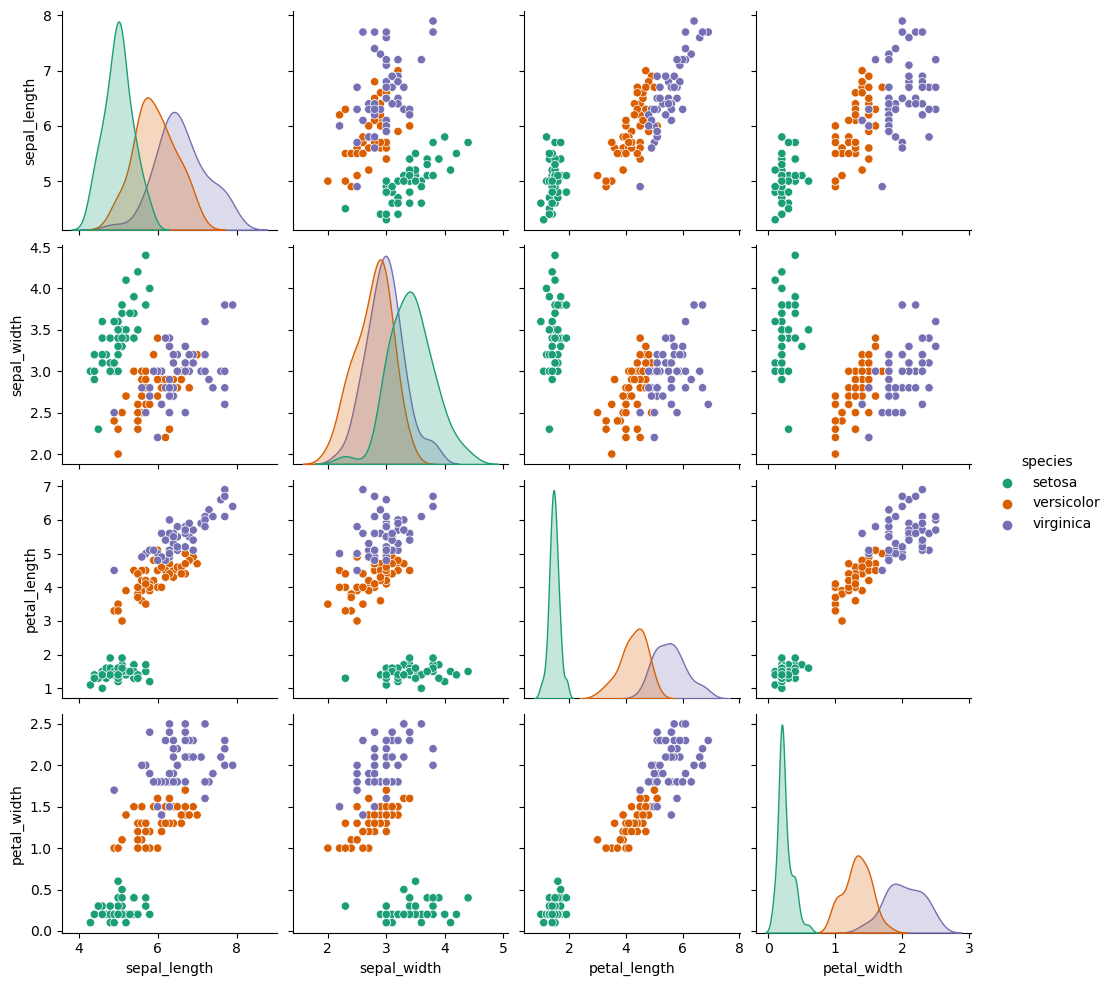

In [65]:
sns.pairplot(data=iris,hue='species',palette='Dark2')

C:\Users\DELL LATITUDE E7440\AppData\Local\Temp\ipykernel_19904\1706623608.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris,x=setosa['sepal_width'],y=setosa['sepal_length'],cmap='plasma',shade=True)


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

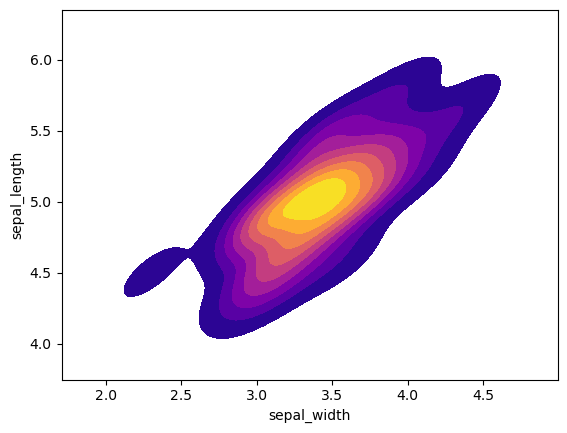

In [66]:
setosa=iris[iris['species']=='setosa']
sns.kdeplot(data=iris,x=setosa['sepal_width'],y=setosa['sepal_length'],cmap='plasma',shade=True)

We just created a kde plot of sepal_length versus sepal width for setosa species of flower

# Selecting the x and y features

In [67]:
x=iris.drop('species',axis=1)
y=iris['species']
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

# Training and Testing the Data set

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

# SUPPORT VECTOR MACHINE

In [70]:
from sklearn.svm import SVC

In [71]:
model=SVC()

In [72]:
model.fit(x_train,y_train)

SVC()

# Predictions and Evaluation 

In [73]:
prediction=model.predict(x_test)
prediction

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor'], dtype=object)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(y_test,prediction))


print('\n')


print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        19
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



[[14  0  0]
 [ 0 19  0]
 [ 0  0 12]]


# GRID SEARCH

In [77]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [81]:
grid=GridSearchCV(SVC(),param_grid,verbose=4)

In [83]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.952 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.952 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.950 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.762 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.800 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.714 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=4)

In [85]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [87]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [91]:
grid_pred=grid.predict(x_test)

In [92]:
print(classification_report(y_test,grid_pred))


print('\n')


print(confusion_matrix(y_test,grid_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        19
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



[[14  0  0]
 [ 0 19  0]
 [ 0  0 12]]
